In [1]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
from nltk.corpus import stopwords

import plotly.express as px

from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

from nltk.tokenize import TweetTokenizer
import pandas as pd
import nltk

In [2]:
# nltk.download('stopwords') 
# nltk.download('wordnet')

In [3]:
## RAW TEXT

In [4]:
#reading the data from the worksheet 
data_df=pd.read_csv("Data_project-3 - Sheet1.csv")
data_df

,Sentiment,title,Unnamed: 2,time
0,2,Assuming to be true that Putin is manipulating...,0,2016-12-30 23:21:38
1,0,My unpleasant experience from a Hillary suppor...,1,2016-12-30 16:47:07
2,2,Given the recent findings about Trump illegall...,2,2016-12-30 14:50:26
3,2,I'll be on Fox News Channel at 1pm (as a Dem S...,3,2016-12-30 14:27:26
4,2,"Russia is unashamedly Authoritarian, Christian...",4,2016-12-30 14:14:00
...,...,...,...,...
1717,3,https://www.washingtonpost.com/video/politics/...,671,2021-01-03 20:14:45
1718,3,Cruz loves trump &amp; hates democracy,672,2021-01-03 15:34:23
1719,3,The Trump Project,673,2021-01-03 13:45:19
1720,0,How would US political system handle Trump 2.0?,675,2021-01-03 11:14:13


In [5]:
#looking for NA values and data type
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiment   1722 non-null   int64 
 1   title       1721 non-null   object
 2   Unnamed: 2  1722 non-null   int64 
 3   time        1722 non-null   object
dtypes: int64(2), object(2)
memory usage: 53.9+ KB


In [6]:
#dropping not needed columns.
data_df=data_df.drop("Unnamed: 2", axis=1)
data_df=data_df.drop(1458)

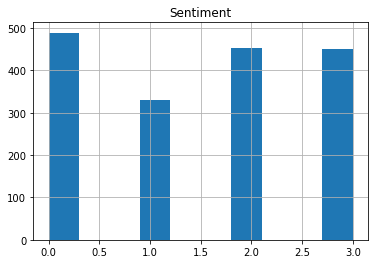

In [7]:
#visualizing the data 
hist = data_df.hist(bins=10)

In [8]:
## TOKENIZATION

In [9]:
sentiment_df=data_df.copy()

In [10]:
sentiment_df['title_length']=sentiment_df.apply(lambda row: len(row['title']), axis=1)

In [11]:
sentiment_df['tokenize']=sentiment_df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)


In [12]:
sentiment_df

,Sentiment,title,time,title_length,tokenize
0,2,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38,108,"[Assuming, to, be, true, that, Putin, is, mani..."
1,0,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07,128,"[My, unpleasant, experience, from, a, Hillary,..."
2,2,Given the recent findings about Trump illegall...,2016-12-30 14:50:26,189,"[Given, the, recent, findings, about, Trump, i..."
3,2,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26,297,"[I, 'll, be, on, Fox, News, Channel, at, 1pm, ..."
4,2,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00,168,"[Russia, is, unashamedly, Authoritarian, ,, Ch..."
...,...,...,...,...,...
1717,3,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45,170,"[https, :, //www.washingtonpost.com/video/poli..."
1718,3,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23,38,"[Cruz, loves, trump, &, amp, ;, hates, democracy]"
1719,3,The Trump Project,2021-01-03 13:45:19,17,"[The, Trump, Project]"
1720,0,How would US political system handle Trump 2.0?,2021-01-03 11:14:13,47,"[How, would, US, political, system, handle, Tr..."


In [13]:
## STOP WORDS

In [14]:
#seting up the stopwords

STOPWORDS=["Bernie",",",".","!",":","?","US","U","u","Donal","Obama","GOP","Sander","GOP party","Biden","support","would","Hillary","Clinton","year""would","could","Clinton","administration","vote","election","Donald","President","Trump","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","to"]


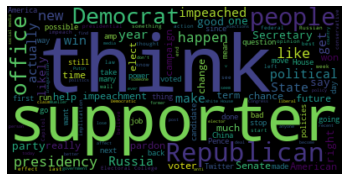

In [15]:
#creating a word claude for the hole data frame

stopwords = set(STOPWORDS)
textt = " ".join(title for title in sentiment_df["title"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [16]:

wordcloud.words_

{'think': 1.0,
 'supporter': 0.9787234042553191,
 'Republican': 0.925531914893617,
 'people': 0.8085106382978723,
 'Democrat': 0.6702127659574468,
 'office': 0.6382978723404256,
 'presidency': 0.6063829787234043,
 'like': 0.5957446808510638,
 'new': 0.5638297872340425,
 'happen': 0.5212765957446809,
 'political': 0.4787234042553192,
 'win': 0.46808510638297873,
 'State': 0.46808510638297873,
 'impeached': 0.44680851063829785,
 'Russia': 0.43617021276595747,
 'get': 0.43617021276595747,
 'actually': 0.425531914893617,
 'make': 0.425531914893617,
 'year': 0.4148936170212766,
 'Secretary': 0.40425531914893614,
 'one': 0.39361702127659576,
 'party': 0.39361702127659576,
 'say': 0.39361702127659576,
 'right': 0.39361702127659576,
 'good': 0.3829787234042553,
 'likely': 0.3829787234042553,
 'impeachment': 0.3829787234042553,
 'much': 0.3723404255319149,
 'future': 0.3723404255319149,
 'Senate': 0.3723404255319149,
 'chance': 0.3617021276595745,
 'American': 0.35106382978723405,
 'campaign': 

In [17]:
positive = sentiment_df[sentiment_df['Sentiment'] == 1]
negative = sentiment_df[sentiment_df['Sentiment'] == 2]
neutral= sentiment_df[sentiment_df['Sentiment'] == 0]
drop= sentiment_df[sentiment_df['Sentiment'] == 3]

In [18]:
#Positive or in favor of Trump
stopwords = set(STOPWORDS)
pos= " ".join(title for title in positive.title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

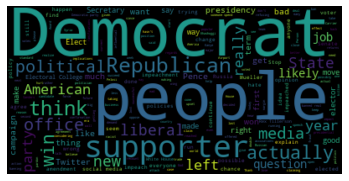

In [19]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
#negative or againts Trump
stopwords = set(STOPWORDS)
neg= " ".join(title for title in negative.title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

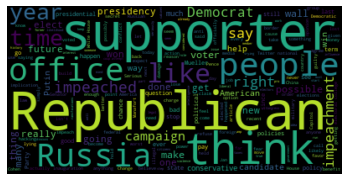

In [21]:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
sentiment_df["Sentiment"]=sentiment_df['Sentiment'].replace({2 : 'negative'})
sentiment_df["Sentiment"]=sentiment_df['Sentiment'].replace({1 : 'positive'})
sentiment_df["Sentiment"]=sentiment_df['Sentiment'].replace({0 : 'neutral'})
sentiment_df["Sentiment"]=sentiment_df['Sentiment'].replace({3 : 'drop'})
sentiment_df

,Sentiment,title,time,title_length,tokenize
0,negative,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38,108,"[Assuming, to, be, true, that, Putin, is, mani..."
1,neutral,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07,128,"[My, unpleasant, experience, from, a, Hillary,..."
2,negative,Given the recent findings about Trump illegall...,2016-12-30 14:50:26,189,"[Given, the, recent, findings, about, Trump, i..."
3,negative,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26,297,"[I, 'll, be, on, Fox, News, Channel, at, 1pm, ..."
4,negative,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00,168,"[Russia, is, unashamedly, Authoritarian, ,, Ch..."
...,...,...,...,...,...
1717,drop,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45,170,"[https, :, //www.washingtonpost.com/video/poli..."
1718,drop,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23,38,"[Cruz, loves, trump, &, amp, ;, hates, democracy]"
1719,drop,The Trump Project,2021-01-03 13:45:19,17,"[The, Trump, Project]"
1720,neutral,How would US political system handle Trump 2.0?,2021-01-03 11:14:13,47,"[How, would, US, political, system, handle, Tr..."


<AxesSubplot:>

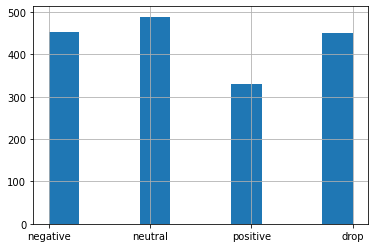

In [23]:
sentiment_hist = sentiment_df['Sentiment'].hist(bins=10)
sentiment_hist

In [24]:
#sentiment_df=sentiment_df.drop(['tokenized','leng'], axis=1)

In [25]:
sentiment_df

,Sentiment,title,time,title_length,tokenize
0,negative,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38,108,"[Assuming, to, be, true, that, Putin, is, mani..."
1,neutral,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07,128,"[My, unpleasant, experience, from, a, Hillary,..."
2,negative,Given the recent findings about Trump illegall...,2016-12-30 14:50:26,189,"[Given, the, recent, findings, about, Trump, i..."
3,negative,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26,297,"[I, 'll, be, on, Fox, News, Channel, at, 1pm, ..."
4,negative,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00,168,"[Russia, is, unashamedly, Authoritarian, ,, Ch..."
...,...,...,...,...,...
1717,drop,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45,170,"[https, :, //www.washingtonpost.com/video/poli..."
1718,drop,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23,38,"[Cruz, loves, trump, &, amp, ;, hates, democracy]"
1719,drop,The Trump Project,2021-01-03 13:45:19,17,"[The, Trump, Project]"
1720,neutral,How would US political system handle Trump 2.0?,2021-01-03 11:14:13,47,"[How, would, US, political, system, handle, Tr..."


In [26]:
filtered_sentence2 = []
for row in sentiment_df["tokenize"]:
    #print(row)
    stop_words = STOPWORDS
    word_tokens=row
    #print(word_tokens)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    filtered_sentence2.append(filtered_sentence)
    for w in word_tokens:
        if w not in stop_words:
            #print(w)
            filtered_sentence.append(w)
        
    #print(filtered_sentence)

#print(filtered_sentence2) 
sentiment_df['tokenize_filter']=filtered_sentence2
sentiment_df

,Sentiment,title,time,title_length,tokenize,tokenize_filter
0,negative,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38,108,"[Assuming, to, be, true, that, Putin, is, mani...","[Assuming, true, Putin, manipulating, Putin, p..."
1,neutral,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07,128,"[My, unpleasant, experience, from, a, Hillary,...","[My, unpleasant, experience, supporter, suppor..."
2,negative,Given the recent findings about Trump illegall...,2016-12-30 14:50:26,189,"[Given, the, recent, findings, about, Trump, i...","[Given, recent, findings, illegally, colluding..."
3,negative,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26,297,"[I, 'll, be, on, Fox, News, Channel, at, 1pm, ...","[I, 'll, Fox, News, Channel, 1pm, (, Dem, Stra..."
4,negative,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00,168,"[Russia, is, unashamedly, Authoritarian, ,, Ch...","[Russia, unashamedly, Authoritarian, Christian..."
...,...,...,...,...,...,...
1717,drop,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45,170,"[https, :, //www.washingtonpost.com/video/poli...","[https, //www.washingtonpost.com/video/politic..."
1718,drop,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23,38,"[Cruz, loves, trump, &, amp, ;, hates, democracy]","[Cruz, loves, trump, &, amp, ;, hates, democracy]"
1719,drop,The Trump Project,2021-01-03 13:45:19,17,"[The, Trump, Project]","[The, Project]"
1720,neutral,How would US political system handle Trump 2.0?,2021-01-03 11:14:13,47,"[How, would, US, political, system, handle, Tr...","[How, political, system, handle, 2.0]"


In [27]:
## TF-IDF

In [28]:
#count of each words per row

#sentiment_df['word_count']=sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1)


#print(sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1))
#{word: sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1).count(word) for word in set(sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1))}
count_vector=[]
for x in sentiment_df['tokenize_filter']:
    count_vector.append({word: x.count(word) for word in set(x)})
print(count_vector)


[{'possibly': 1, 'end': 1, 'Putin': 2, 'true': 1, 'Assuming': 1, 'mind': 1, 'manipulating': 1, 'goal': 1}, {'experience': 1, 'I': 1, 'supporters': 2, 'unpleasant': 1, 'learned': 1, 'excerpt': 1, 'A': 1, 'millennial': 1, 'My': 1, 'supporter': 1}, {'colluding': 1, 'electorate': 1, 'year': 1, 'recent': 1, 'win': 1, 'deserved': 1, 'illegally': 1, 'findings': 1, 'order': 1, 'think': 1, 'better': 1, 'American': 1, 'Given': 1, 'Russia': 1}, {'Fox': 1, 'Channel': 1, "''": 1, 'implemented': 1, 'accomplishments': 1, 'Sean': 1, 'campaign': 1, '1pm': 1, 'amp': 1, 'incoming': 1, 'former': 1, '``': 1, 'director': 1, 'jealous': 1, 'already': 1, '(': 1, 'Pres': 1, 'Friction': 1, 'escalating': 1, 'Dem': 1, "'ll": 1, 'discuss': 1, 'News': 1, 'WH': 1, 'Strategist': 1, 'says': 1, '&': 1, ';': 1, 'Topic': 1, ')': 1, 'secretary': 1, 'Admin': 1, '-': 1, 'I': 1, 'Spicer': 1, 'press': 1, 'Team': 1}, {'pro-Russian': 1, 'Americans': 1, 'given': 1, 'anti-gay': 1, 'Authoritarian': 1, 'significant': 1, 'unashamedly

In [29]:
tokenize_list=sentiment_df["tokenize_filter"][0].tolist()
tokenize_list


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create an instance of CountfVectorizer
#vectoriser = CountVectorizer()

In [ ]:
# Fit to the data and transform to feature matrix
#X=vectorizer.fit_transform(sentiment_df[])

In [ ]:
import numpy as np

In [ ]:
dataMatrix = np.array([count_vector[i] for i in tokenize_list])
dataMatrix